In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
%matplotlib inline
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [86]:
def strQ2B(ustring):
    ss = []
    for s in ustring:
        rstring = ""
        for uchar in s:
            inside_code = ord(uchar)
            if inside_code == 12288:  # 全角空格直接转换
                inside_code = 32
            elif (inside_code >= 65281 and inside_code <= 65374):  # 全角字符（除空格）根据关系转化
                inside_code -= 65248
            rstring += chr(inside_code)
        ss.append(rstring)
    return ss

def getnum(string): 
    num = []
    for s in jieba.lcut(string, cut_all=False):
        l = []
        for t in s.split():
            try:
                l.append(float(t))
            except ValueError:
                pass
        if len(l) > 0:
            num.append(l[0])
    
    return num

def is_chinese(uchar):
    """判断一个unicode是否是汉字"""
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False
    
def cus(clf,x,y):
    ypred = clf.predict(x)
    return np.mean((np.log(np.abs((ypred+1)/(y+1)))**2))

n_folds = 10
def cv(model,X,y):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= cross_val_score(model, X, y, scoring=cus, cv = kf)
    return(rmse)
    

In [3]:
data1 = pd.read_csv('meinian_round1_data_part1_20180408.txt',delimiter="$")
data2 = pd.read_csv('meinian_round1_data_part2_20180408.txt',delimiter="$")
train = pd.read_csv('meinian_round1_train_20180408.csv', encoding = "ISO-8859-1")
test = pd.read_csv('meinian_round1_test_b_20180505.csv', encoding = "ISO-8859-1")


data = data1.append(data2, ignore_index=True)

In [4]:
data= pd.pivot_table(data, values='field_results', index='vid',columns='table_id', aggfunc=lambda x: ' '.join(str(v) for v in x))
data.reset_index(inplace=True)
data.set_index('vid',inplace=True)



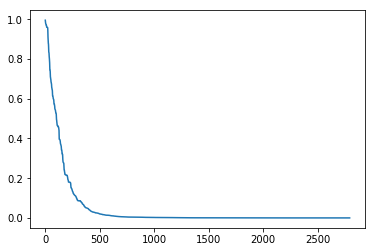

In [68]:
(rowlen,collen) = data.shape
d = {}
for i in range(collen):
    d[i] = 1 - (data.iloc[:,i].isnull().sum()/57298)
x = list(d.values())
x = sorted(x, reverse=True)
plt.plot(x)
plt.show()

index_keep = [k for k in d if d[k]>0.8]

data_k = data.iloc[:,index_keep]

col_0420_rep = {'未见异常':0, '正常':0, '未闻及异常':0, '正常 正常':0, '有力':1, '心音弱':2, '心音遥远':2, '较低':2,
       '强弱不等':3, '心音强':1, '心音弱, 心音遥远':2, '心音强, 心音遥远':1, '右位心':0, '心音遥远, 心音弱':2,
       '..........................................................................................0':0,
       '主动脉第2心音强':1, '弱':2, '第二心音分裂':2, '低钝':2}
data_k.replace({"0420": col_0420_rep},inplace=True)

col_2302_rep = {'健康':0, '疾病':2, 'nan':0, '亚健康':1, ' 健康':0, '正常疲劳反应 健康':0,
       '健康？？？？？？？？？？？？？？？':0, '健康 健康':0, '6C17002059健康':0, '.健康':0,
       '6C17002185健康':0, '6C17002193健康':0, '6C17001723健康':0, '6C17002177健康':0,
       '.+健康':0, '3健康':0, '、健康':0, '6C17002207健康':0, 'Z117114765健康':0,
       'Z117078437健康':0,
       '                                                          健康':0,
       'I117110034健康':0, '                        健康':0, '261Quite34869健康':0,
       'P617026382健康':0, 'I117105807健康':0, 'Q21701909%健康':0, '671809健康':0,
       'Z117136428健康':0, '98健康':0, '1、289965健康':0, '5283698738881健康':0,
       'Z117053064健康':0, 'y疾病':2, 'P617026234健康':0, '7817076622健康':0, '肥健康':1,
       '                                                                健康':0}
data_k.replace({"2302": col_2302_rep},inplace=True)

col_3190_rep = {'-':0, '阴性':0, '+-':1, '+':2, '++':3, '+++':4, '-        0mmol/L':0, '2+':3,
       '0(-)':0, '阳性(+)':2, '++++':5, '2.8(+-)':1, '未做':0, '3+':4, '--':0, '阳性(1+)':2,
       '+1     5.5mmol/L':2, '≥55(+4)':5, '阳性3+':4}
data_k.replace({"3190": col_3190_rep},inplace=True)

col_3191_rep = {'-':0, '阴性':0, '+':2, '-        0umol/L':0, '0(-)':0, '+++':4, '未做':0,
       '阳性(+)':2, '8.6(+1)':2, '++':3, '+-':1, '2+':3, 'Normal':0}
data_k.replace({"3191": col_3191_rep},inplace=True)

col_3192_rep = {'-':0, '阴性':0, '+-':1, '+':2, '-        0mmol/L':0, '0(-)':0, '++':3, '未做':0,
       '+++':4, '0.5(+-)':1, '1.5(+1)':2, '4.0(+2)':3, '1+':2, '--':0, '阳性(+)':2,
       '+1     1.5mmol/L':2, '+-     0.5mmol/L':1}
data_k.replace({"3192": col_3192_rep},inplace=True)

col_3195_rep = {'-':0, '阴性':0, '+-':1, '+':2, '-           0g/L':0, '2+':3, '++':3, '0(-)':0, '阳性(+)':2, '+++':4, '未做':0, '3-5':4, '1+':2, '0.15(+-)':1, '+-       0.15g/L':1,   '0.3(+1)':2, '+1        0.3g/L':2, '1.0(+2)':3, '阳性(1+)':2, '+1':2}
data_k.replace({"3195": col_3195_rep},inplace=True)

col_3197_rep={'-':0, '阴性':0, '+':2, '未做':0, '+-':1, '--':0, '1+':2}
data_k.replace({"3197": col_3197_rep},inplace=True)

col_3196_rep = {'33(+1)':2, '4.9':6, '6.9':8, '阴性':0, '+++':4, '-':0, '3.4':5, '3.5':5, 'NormaL':0, '正常':0, '--':0, '2+':3, '5.7':7, '阳性(+)':2, '+':2, '6.8':8, '1+':2, '5.9':7, '++':3, '未做':0, '5.8':7, '+-':1, 'Normal':0}
data_k.replace({"3196": col_3196_rep},inplace=True)

col_3430_rep = {'血液':0, '+2':3, '阴性':0, '+++':4, '0-4':5, '-':0, '70(+1)':2, '125(+2)':3, '１＋':2, '15(+-)':1, '+1':2, '3':6, '+-    70CELL/uL':2, '未见':0, '阳性(+)':2, '0(-)':0, '+-     15CELL/uL':1, '+1     70CELL/uL':2, '阳性+':2, '+':2, '500(+3)':4, '0-1/HP':7, '3-5/hp':8, '1+':2, '++':3, '+/HP':2, '未做':0, '阳性(1+)':2, '-     15CELL/uL':1, '10-15':9, '+-':1, '-       0CELL/uL':0}
data_k.replace({"3430": col_3430_rep},inplace=True)

col_3730_rep ={'0-1':1,'1':1, '1-2':2, '2':2, '1-3':2,'2-5':3,'3-4':3,'5-10':4, '0-2':1, '3':3, '4':3, '0':0, '阴性':0,  '查见':1, '未见':0,  '未检出':0, '-':0,  '上皮细胞+':5,  '上皮细胞2+':6, '上皮细胞3+':7,'颗粒管型0-1':8,'颗粒管型0-3':9, '颗粒管型0-2':10,  '颗粒0-2/lp':11, '颗粒管型偶见':8, '透明管型0-2':12, '透明管型0-1':13,'见透明':14, '透明管型+':15, '查见透明管型':14, '0-1/HP':16,'1-3/HP':17,'3-4/HP':18,  '0-1/lp':19,    '0个/LP':0, '+':20,'白细胞管型：0-3/LP':21}
data_k.replace({"3730": col_3730_rep},inplace=True)

colname = list(data_k)

trans2num = [12,15,17,18,19,20,21,22,24,25,26,31]
for colind in trans2num:
    a = list(data_k.iloc[:,colind])
    b = []
    for ele in a:
        string = str(ele)
        if string is None:
            b.append(np.nan)
        elif string=='nan':
            b.append(np.nan)
        else:
            string = strQ2B(string)
            string = ''.join(string)
            l = getnum(string)
            if len(l) == 0:
                b.append(np.nan)
            else:
                meanl = sum(l) / float(len(l))
                b.append(meanl)
    data_k[colname[colind]+'new'] = b
    
data_k.loc[data_k['2403new'] == data_k['2403new'].max(),['2403new']] = 57.142
data_k['BMI'] = data_k['2403new']/data_k['2404new']**2*10000

xfeature = [colname[i]+'new' for i in trans2num] 
xfeature +=["0420","2302","3190","3191","3192","3195","3197",'3196','3430','3730','BMI']

data_f = data_k.loc[:,xfeature]


In [69]:
data_f.loc[data_f['10004new']>1000,'10004new'] = 1.799
data_f.loc[data_f['1814new']>250,'1814new'] = np.nan
data_f.loc[data_f['1815new']>150,'1815new'] = np.nan
data_f.loc[data_f['1850new']>30,'1850new'] = np.nan
data_f.loc[data_f['190new']>300,'190new'] = np.nan
data_f.loc[data_f['2404new']<125,'2404new'] = np.nan
data_f.loc[data_f['2405new']>5000,'2405new'] = np.nan
data_f.loc[data_f['3193new']>1.1,'3193new'] = np.nan

data_f.replace('None', np.nan, inplace=True)
for head in xfeature:
    data_f[head].fillna(data_f[head].value_counts().index[0], inplace = True)

for colind in list(train):
    a = list(train.loc[:,colind])
    b = []
    for ele in a:
        string = str(ele)
        if string is None:
            b.append(np.nan)
        elif string=='nan':
            b.append(np.nan)
        else:
            string = strQ2B(string)
            string = ''.join(string)
            l = getnum(string)
            if len(l) == 0:
                b.append(np.nan)
            else:
                meanl = sum(l) / float(len(l))
                b.append(meanl)
    train[colind+'new'] = b
yfeature = ['Anew','Bnew','Cnew','Dnew','Enew']
train_f = train.loc[:,yfeature]

train_f.loc[train_f['Anew']==0,'Anew'] = np.nan
train_f.loc[train_f['Bnew']==0,'Bnew'] = np.nan
train_f.loc[train_f['Bnew']>1000,'Bnew'] = 100.164
train_f.loc[train_f['Bnew']>900,'Bnew'] = 97.4


for head in yfeature:
    train_f[head].fillna(train_f[head].value_counts().index[0], inplace = True)

In [7]:
# ##### check the result after remove outlier
# for head in xfeature:
#     x = list(data_f[head])
#     a = [float(el) for el in x if (str(el) != 'nan') and (el is not None)]
#     plt.figure()
#     plt.hist(a)
#     print(max(a),min(a))
#     plt.title(head)
#     plt.show

In [70]:
index = train.vid
Xtrain = data_f.loc[index,xfeature]
Ytrain = train_f.copy()

index2 = test.vid
Xtest = data_f.loc[index2,xfeature]

In [92]:
# save train data
# Xtrain.to_csv('Xtrain.csv',index = False, float_format= "%.6f")
# Ytrain.to_csv('Ytrain.csv',index = False, float_format= "%.6f")
# Xtest.to_csv('Xtest.csv',index = False, float_format= "%.6f")

In [128]:
index = train.vid
xfeature = [colname[i]+'new' for i in trans2num] 
xfeature +=["0420","2302","3190","3191","3192","3195","3197",'3196','3430','3730','BMI']
Xtrain = data_f.loc[index,xfeature]

print(Xtrain.shape)

#Base models
linear = LinearRegression()
nn=  MLPRegressor(hidden_layer_sizes=(20,10, 2), random_state=1)

svr = SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.00001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=True, max_iter=-1)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#KRR = KernelRidge(alpha=1, kernel='linear', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=50,min_samples_split=1000, 
                                   loss='huber', random_state =5)
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_all = [linear,GBoost]
name = ['linear','GBoost']
#Base models scores
# for head in yfeature:
#     score = cv(lasso, Xtrain, Ytrain[head])
#     print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# for head in yfeature:
#     score = cv(ENet, Xtrain, Ytrain[head])
#     print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

for model,n in zip(model_all,name):
    print(n)
    for head in yfeature:
        score = cv(model, Xtrain, Ytrain[head])
        print("score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    print('*'*100)
    
# for head in yfeature:
#     score = cv(model_xgb, Xtrain, Ytrain[head])
#     print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    
# for head in yfeature:
#     score = cv(model_lgb, Xtrain, Ytrain[head])
#     print("LGBM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

(38199, 23)
linear
score: 0.0175 (0.0006)

score: 0.0208 (0.0009)

score: 0.0948 (0.0020)

score: 0.0164 (0.0014)

score: 0.0469 (0.0042)

****************************************************************************************************
GBoost
score: 0.0166 (0.0006)

score: 0.0202 (0.0008)

score: 0.0877 (0.0038)



KeyboardInterrupt: 

In [ ]:
def getcolkeyword(colind):
    test = [x for x in data_k.iloc[:,colind] if (x is not None) and (str(x) != 'nan')]
    string = ' '.join(test)
    li = jieba.lcut(string, cut_all=False)
    setli = list(set(li))
    allwordlist = [x for x in setli if is_chinese(x)]
    fqcount = pd.DataFrame(np.zeros((len(allwordlist),1)),index=allwordlist,columns=['freq'])

    for string in data_k.iloc[:,colind]: 
        if (string is not None) and (str(string) != 'nan'): 
            wordsli = jieba.lcut(string, cut_all=False)
            for word in wordsli: 
                if word in allwordlist:
                    fqcount.loc[word] += 1

    fqcount.sort_values(by=['freq'],ascending=False,inplace=True)
    fqcount /= fqcount.sum()
    keyword = fqcount.index[fqcount['freq']>0.00001].tolist()
    return keyword


In [121]:
keywords9 = ['未见异常', '未查', '无', '未见', '饮食', '运动', '低盐', '血压','降压', '压痛', '睡眠', '充足', '浮肿', '术后', '待查', '突下', '胆囊', '下腹', '眼睑', '血糖', '糖尿病', '心脏', '降糖药', '彩超', '双下肢', '触痛', '戒烟', '腹部', '双肺']

keywords14 = ['无','记载', '高血压', '偏高', '糖尿病', '脂肪肝', '血脂', '剖宫产', '胆囊', '未', '血压', '阑尾炎', '胃炎', '血糖', '肾结石', '子宫', '冠心病', '甲状腺', '尿酸', '乙肝', '腰椎间盘', '突出', '脑梗塞', '胆结石', '颈椎病', '冠状动脉', '肌瘤', '良性', '健康', '支气管炎', '支架', '胆囊炎', '植入术', '肺结核', '甲肝', '痛风', '胃溃疡', '减退', '支气管', '心脏病', '吸烟史', '亢进', '不足', '胆囊息肉', '先天性', '小三阳', '宫外孕', '哮喘', '早搏', '结石', '胃','十二指肠', '心肌', '溃疡', '球部', '尿路', '乳腺', '心肌梗塞', '卵巢囊肿', '胆石症', '甲状腺癌', '乳腺癌', '胸膜炎', '过敏性', '鼻炎', '微创', '骨折', '房颤', '前列腺', '肝', '结肠炎', '脾', '双侧', '贫血', '心肌炎', '增生', '剖腹产', '心脏起搏器', '脑溢血', '肺部', '阻塞性', '息肉', '搭桥术', '脑血栓', '慢性肾炎', '囊肿', '瓣膜', '高血糖', '未见异常', '返流性', '食道炎', '结节', '外伤', '取石', '心脏', '胃穿孔', '大三阳', '风湿性关节炎', '轻度', '肿瘤', '胃窦炎', '气胸', '保胆', '肠梗阻', '甲状腺炎', '射频', '阳性', '桥本', '下肢', '结肠', '表面抗原', '消融术', '脑血管', '肺', '扩张', '胰腺炎', '脑供', '孕', '腹部', '血吸虫病', '腰椎', '甲亢', '高尿酸', '癫痫病', '肾病', '疝', '血尿酸', '脂肪瘤', '血管瘤', '膝关节', '肥胖', '血粘度', '静脉曲张']

keywords8 = ['异常', '未', '未见异常', '高血压', '偏高', '心律', '糖尿病', '未见', '心律不齐', '腹壁', '慢性', '脂肪肝', '心动','血脂', '过缓', '心率', '杂音', '剖宫产', '胆囊', '血压', '胃炎', '阑尾炎', '早搏', '不', '心脏', '心音', '血糖', '压痛', '呼吸', '肾结石', '子宫', '收缩期', '冠心病', '甲状腺', '二尖瓣', '饱和度', '血氧', '青霉素', '尿酸', '腹部', '正常', '乙肝', '偏高余', '腰椎间盘', '突出', '心动过速', '脑梗塞', '颈椎病', '胆结石', '冠状动脉', '弱', '肌瘤', '窦性', '支气管炎', '病变', '支架', '植入术', '主动脉瓣', '胆囊炎', '甲肝', '双肺', '肺结核', '肝脏', '痛风', '音粗', '肥胖', '下腹部', '运动', '饮食结构','中断', '频发', '胃溃疡', '绵阳', '大小', '三尖瓣', '触诊', '肺部', '减退', '磺胺类', '叩击', '不足', '支气管', '亢进', '胆囊息肉', '小三阳', '脾', '心脏病', '宫外孕', '减弱', '心肌', '供血', '肺罗音', '窦性心', '十二指肠', '尿路', '溃疡', '哮喘', '肾脏', '结石', '球部', '先天性', '胃', '粗糙', '脾脏', '动过', '缓', '房颤', '神经内科', '系统', '脐周', '心肌梗塞', '胸部', '卵巢囊肿', '乳腺', '肺动脉瓣', '花粉', '胆石症', '舒张',  '绝对', '肝', '肺', '乳腺癌', '胸膜炎', '甲状腺癌', '不齐', '鼻炎']

In [129]:
colind = 8
keyword = keywords8
collen = data_k.iloc[:,colind].shape[0]
df_from_col8 = pd.DataFrame(np.zeros((collen,len(keyword))),columns=keyword,index=data_k.index)

for i in range(collen):
    x = data_k.iloc[i,colind]
    if (x is not None) and (str(x) != 'nan'):
        cutli = jieba.lcut(x, cut_all=False)
        for word in cutli:
            if word in keyword:
                df_from_col8.loc[df_from_col8.index[i],word] = 1
                
colind = 9
keyword = keywords9
collen = data_k.iloc[:,colind].shape[0]
df_from_col9 = pd.DataFrame(np.zeros((collen,len(keyword))),columns=keyword,index=data_k.index)

for i in range(collen):
    x = data_k.iloc[i,colind]
    if (x is not None) and (str(x) != 'nan'):
        cutli = jieba.lcut(x, cut_all=False)
        for word in cutli:
            if word in keyword:
                df_from_col9.loc[df_from_col9.index[i],word] = 1
                
colind = 14
keyword = keywords14
collen = data_k.iloc[:,colind].shape[0]
df_from_col14 = pd.DataFrame(np.zeros((collen,len(keyword))),columns=keyword,index=data_k.index)

for i in range(collen):
    x = data_k.iloc[i,colind]
    if (x is not None) and (str(x) != 'nan'):
        cutli = jieba.lcut(x, cut_all=False)
        for word in cutli:
            if word in keyword:
                df_from_col14.loc[df_from_col14.index[i],word] = 1

df_from_col = pd.concat([df_from_col8, df_from_col9,df_from_col14], axis=1)
df_from_col = df_from_col.groupby(lambda x:x, axis=1).sum()

In [185]:
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [193]:
data_new = pd.concat([data_f, df_from_col], axis=1)

xfeature = [colname[i]+'new' for i in trans2num] 
xfeature +=["0420","2302","3190","3191","3192","3195","3197",'3196','3430','3730','BMI']
xfeature = xfeature + list(set(keywords8+keywords9+keywords14))

index = train.vid
Xtrain = data_new.loc[index,xfeature]
index2 = test.vid
Xtest = data_new.loc[index2,xfeature]
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)

(38199, 231)
(9532, 231)
(38199, 5)


In [194]:
Xtrain.to_csv('Xtrain.csv',index = False, float_format= "%.6f")
Ytrain.to_csv('Ytrain.csv',index = False, float_format= "%.6f")
Xtest.to_csv('Xtest.csv',index = False, float_format= "%.6f")

In [189]:
#Base models
linear = LinearRegression()
nn=  MLPRegressor(hidden_layer_sizes=(20, 10,5, 2), random_state=1)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#KRR = KernelRidge(alpha=1, kernel='linear', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=50,min_samples_split=1000, 
                                   loss='huber', random_state =5)

knn = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)

rf = RandomForestRegressor(n_estimators=50, n_jobs=-1)

# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_all = [GBoost]
for model in model_all:
    for head in yfeature:
        score = cv(model, Xtrain, Ytrain[head])
        print("score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    print('*'*100)

(38199, 231)


KeyboardInterrupt: 

In [19]:
#####  generate results to submit
index2 = test.vid
Xtest = data_new.loc[index2,xfeature]
ypred = pd.DataFrame()
ypred['vid'] = test.vid
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=50,min_samples_split=1000, 
                                   loss='huber', random_state =5)
for head in yfeature:
    GBoost.fit(Xtrain, Ytrain[head])
    ypred[head] = GBoost.predict(Xtest)
    
ypred.to_csv('submit.csv',index=False,header=False)

In [120]:
data_new = pd.concat([data_f, df_from_col], axis=1)
index = train.vid
xfeature = [colname[i]+'new' for i in trans2num] 
xfeature +=["0420","2302","3190","3191","3192","3195","3197",'BMI']
xfeature = xfeature + keyword
Xtrain = data_new .loc[index,xfeature]

print(Xtrain.shape)

#Base models
linear = LinearRegression()
nn=  MLPRegressor(hidden_layer_sizes=(20, 10,5, 2), random_state=1)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#KRR = KernelRidge(alpha=1, kernel='linear', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=50,min_samples_split=1000, 
                                   loss='huber', random_state =5)
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_all = [linear,GBoost]
#Base models scores
# for head in yfeature:
#     score = cv(lasso, Xtrain, Ytrain[head])
#     print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# for head in yfeature:
#     score = cv(ENet, Xtrain, Ytrain[head])
#     print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

for model in model_all:
    for head in yfeature:
        score = cv(model, Xtrain, Ytrain[head])
        print("score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
    print('*'*100)

(38199, 196)
score: 0.0160 (0.0005)

score: 0.0199 (0.0004)

score: 0.0960 (0.0014)

score: 0.0166 (0.0013)

score: 0.0472 (0.0020)

****************************************************************************************************
score: 0.0153 (0.0005)

score: 0.0192 (0.0005)

score: 0.0874 (0.0031)

score: 0.0159 (0.0013)

score: 0.0451 (0.0023)

****************************************************************************************************


## previous resutls
### linear
score: 0.0175 (0.0005)

score: 0.0208 (0.0005)

score: 0.0951 (0.0017)

score: 0.0165 (0.0013)

score: 0.0470 (0.0022)
  
### GB  
score: 0.0167 (0.0005)

score: 0.0203 (0.0004)

score: 0.0879 (0.0032)

score: 0.0159 (0.0012)

score: 0.0458 (0.0023)

In [138]:
#####  generate results to submit
index2 = test.vid
Xtest = data_new.loc[index2,xfeature]
ypred = pd.DataFrame()
ypred['vid'] = test.vid
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=50,min_samples_split=1000, 
                                   loss='huber', random_state =5)
for head in yfeature:
    GBoost.fit(Xtrain, Ytrain[head])
    ypred[head] = GBoost.predict(Xtest)
    
ypred.to_csv('submit.csv',index=False,header=False)

In [ ]:
import jieba
text = "肝脏大小、形态正常，包膜光整，肝内血管走行较清晰，回声均匀。"
seg_list = jieba.cut(text, cut_all=True)
print("Full Mode: " + "/" .join(seg_list))  # 全模式

seg_list = jieba.cut(text, cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut(text)  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search(text)  # 搜索引擎模式
print(", ".join(seg_list))

# import jieba.posseg as pseg
# #查看词性
# words = pseg.cut("我爱北京天安门")
# for word, flag in words:
#     print('%s %s' % (word, flag))